# Caso Final Modulo 4

Library import 

In [8]:
# Importamos las librerias con las que vamos a trabajar
import nltk
from nltk.chunk.util import conlltags2tree, tree2conlltags
#from nltk import ChunkParserI
import nltk.chunk, nltk.tag
from nltk.corpus import conll2000

Para realizar la siguiente practica se han seguido los pasos de la siguiente imagen. 
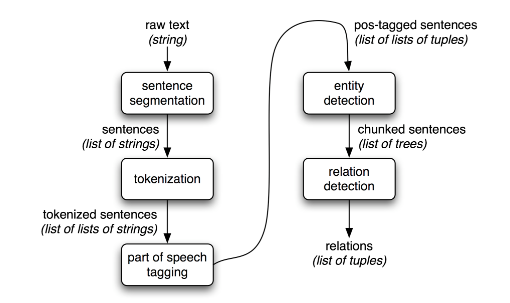


Creamos nuestro corpus para poder entrenar el modelo. Tambien se podria insertar en forma de documento csv para que el codigo quede mas limpio.

In [9]:
def load_corpus():
    corpus = "Quisiera pedir un hamburguesa,Quiero una tortilla y una cerveza,Me pones un pollo y una ensalada,Quiero una paella,Quiero un bocadillo,Quiero una pizza,Ponme una sopa,Quiero un filete,Quisiera pedir una ensalada,Quiero cinco bocadillos,Quisiera una empanada,Quiero unas croquetas,Quisiera morcilla,Quiero pedir un solomillo,Quiero unos macarrones,Quiero una Lasagna,Quiero una hamburguesa, una de patatas fritas y una cerveza,Quiero un lenguado,Quiero un bonito,Quisiera una sepia,Quiero cinco cervezas,Quiero tres sidras y tres pinchos,Quiero cinco manzanas y tres melocotones,Quisiera cuatro solomillos,Quiero una naranja y dos peras"
    return (corpus)

Creamos las funciones de tokenizacion, segmentacion i part of speech tag (Pos_tag es el analisi morfologico)

In [10]:
def preprocess(document):
    sentences = nltk.sent_tokenize(document) 
    tokens = [nltk.word_tokenize(sent) for sent in sentences]
    tags = [nltk.pos_tag(sent) for sent in tokens]
    return tags

def test():
    test_document='quiero 2 bocadillos de jamon y 3 pizzas de queso'
    print(preprocess(test_document))
    
document_test = test()

[[('quiero', 'RB'), ('2', 'CD'), ('bocadillos', 'NN'), ('de', 'FW'), ('jamon', 'NN'), ('y', 'CC'), ('3', 'CD'), ('pizzas', 'NN'), ('de', 'FW'), ('queso', 'NN')]]


Una vez tenemos todas las etiquetas con las categorias morfologicas, se puede hacer el chunking. 

In [11]:
# Definimos la funcion RegexParser
def regex_parser(document):  
    grammar = r'''
    Comida: {<CD>*<NN>+}  
    {<JJ>*<NN>+}
    {<CD>*<NN><IN>*<NN>+}
    Cantidad: {<JJ>}
    {<CD>}
    {<DT>}
    {<NN>}
    '''

    _regex_parser = nltk.RegexpParser(grammar)
    parsed_sentence = _regex_parser.parse(document)
    return(parsed_sentence)

def test_regex_parser():
    document= [('quiero', 'RB'), ('2', 'CD'), ('bocadillos', 'NN'), ('de', 'FW'), ('jamon', 'NN'), ('y', 'CC'), ('3', 'CD'), ('pizzas', 'NN'), ('de', 'FW'), ('queso', 'NN')]
    print(regex_parser(document))
    return regex_parser(document)

parsed_sentence = test_regex_parser()
print(parsed_sentence)

(S
  quiero/RB
  (Comida 2/CD bocadillos/NN)
  de/FW
  (Comida jamon/NN)
  y/CC
  (Comida 3/CD pizzas/NN)
  de/FW
  (Comida queso/NN))
(S
  quiero/RB
  (Comida 2/CD bocadillos/NN)
  de/FW
  (Comida jamon/NN)
  y/CC
  (Comida 3/CD pizzas/NN)
  de/FW
  (Comida queso/NN))


In [12]:
from collections import defaultdict
def convert_quantity(str_number): 
    lista_num = ["un","una","dos","tres","cuatro","cinco","seis", 
                 "siete","ocho","nueve", "diez"]
    if str_number in lista_num:
        _dict = {"un":"1","una":"1","dos":"2","tres":"3","cuatro":"4","cinco":"5", "seis":"6", 
             "siete":"7","ocho": "8", "nueve":"9", "diez":"10"}
        return _dict[str_number]      
    else: return str_number

def food_order(result): #funcion pedir_comida
    data = []
    for nodo in result:
        if type(nodo) == tuple:
            continue
        tipo = nodo.label()
        cant = 1
        for elemento in nodo:
            print(elemento)
            if type(elemento) != tuple:
                continue
            palabra, category = elemento
            palabra = convert_quantity(palabra)
 
            list_category = ['NN','NNS','JJ']
            list_num = ["1","2","3","4","5","6","7","8","9","10", "y",",","."]
            if tipo == 'Comida' and (palabra not in list_num):
                data.append(dict(comida=palabra, cantidad=cant))    
    return(data)        

print(type(parsed_sentence))
food_order(parsed_sentence)

<class 'nltk.tree.Tree'>
('2', 'CD')
('bocadillos', 'NN')
('jamon', 'NN')
('3', 'CD')
('pizzas', 'NN')
('queso', 'NN')


[{'comida': 'bocadillos', 'cantidad': 1},
 {'comida': 'jamon', 'cantidad': 1},
 {'comida': 'pizzas', 'cantidad': 1},
 {'comida': 'queso', 'cantidad': 1}]

In [13]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] 
                     for sent in train_sents]

        self.tagger = nltk.UnigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                    in zip(sentence, chunktags)] 
        return nltk.chunk.conlltags2tree(conlltags)    

In [16]:
# Función principal    
def main():
    # cargo el corpus con pedidos al restaurante
    corpora = load_corpus() 

#     Segm = Segmentacion(corpora)
#     print ("\n\n1. Frases:",Segm)

#     tok = Tokenizacion(Segm)
#     print ("\n\n2. Tokens:",tok)

#     ptag = Pos_Tag(tok)
#     print ("\n\n3. Analisis Morfologico:",ptag)
    

    # Construimos Regex Parser
    RegexParser = regex_parser(ptag)
    print("\n\n4 Parsed Sentence = ", RegexParser)  

    food_order_print = food_order(RegexParser)
    print("\n\n5 Salida = ",food_order_print)
    
    iob_tags = tree2conlltags(RegexParser)
    print ("\n\n6 IOB Tags = ",iob_tags)
    
main()

NameError: name 'ptag' is not defined